In [439]:
using LinearAlgebra
using Plots

In [440]:
function generate_subspaces(n)
    E,=qr(randn(n,n))
    k = div(n, 2)
    E1=E[:,1:k]
    E2=E[:,k+1:end]
    F,=qr(randn(n-1,n-1))
    F1=F[:,1:k]
    F2=F[:,k+1:end]
    return E,F,E1,E2,F1,F2
end

generate_subspaces (generic function with 1 method)

In [441]:
function cs_decomposition(n,E,F,E1,E2,F1,F2)
    F1 = vcat(F1, zeros(1, size(F1, 2)))
    F2 = vcat(F2, zeros(1, size(F2, 2)))
    F2 = hcat(F2, zeros(size(F2, 1), 1))
    U1,S11,V1=svd(E1'*F1,full=true)
    temp,S12,V2=svd(E1'*F2,full=true)
    U2,S22,V2=svd(E2'*F2,full=true)
    D=[U1'*E1'*F1*V1 U1'*E1'*F2*V2
    U2'*E2'*F1*V1 U2'*E2'*F2*V2]
    U=[U1 zeros(2,n-2)
    zeros(n-2,2) U2]
    W=E*U*D*U'*E'
    return W, U, U1, U2, V1, V2, D
end

cs_decomposition (generic function with 4 methods)

In [442]:
function draw(M, n)
    x = M[:, 1]
    y = M[:, 2]
    z = x + im * y
    e = z .^ 2
    E = [real(e)' ; imag(e)']
    
    points = zeros(2, n + 1)
    for i in 1:n
        points[:, i + 1] = sum(E[:, 1:i], dims=2)
    end
    
    return points
end

draw (generic function with 2 methods)

In [ ]:
n=4
E,F,E1,E2,F1,F2=generate_subspaces(n)

(LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}([2.7172275101335144 -0.032772368610024825 -0.971867722971121 0.8971569112511413; -0.3023525081690244 0.6923063301337169 -0.7061824301498318 -1.336923327370688; -0.4390296459833061 -0.4196177346379902 -1.3266229656860362 0.05353144903974383; -0.228753968133546 0.5604746186614965 -0.8512820382879792 -0.3723873390967616], [1.4964543976378348 0.4947415283541347 0.9384128447398633 0.0; 6.95325750542584e-310 1.3420919674287375 1.3956286250843584 0.0; 1.2026369963857e-311 1.2026303356377e-311 1.1596346651549485 0.0; 6.95325750542584e-310 6.95325750542584e-310 6.95325750542584e-310 0.0]), LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}([1.8050819209472333 -0.5548757890631871 0.785963932771748; -0.006605183493974194 -1.8768265105527155 -2.625794311894264; 0.3584352487302082 -0.23258520972527263 1.2455713432211006], [1.77223351303319 0.3025365276036992 0.0; 0.0 1.8973606086116415 0.0; 0.0 6.9532541426688

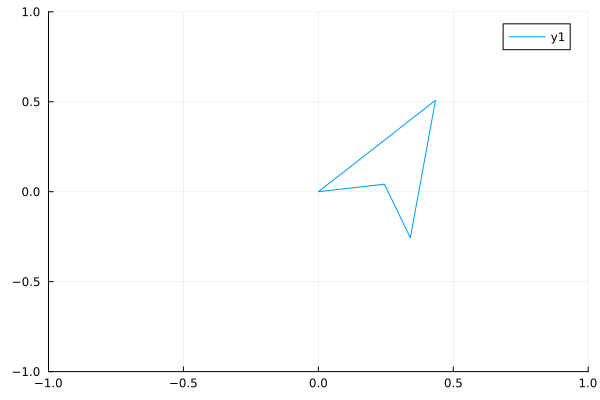

In [444]:
points=draw(E1,n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

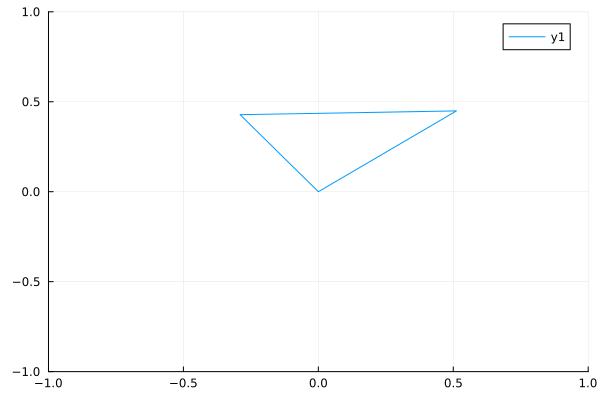

In [445]:
points=draw(F1,n-1)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

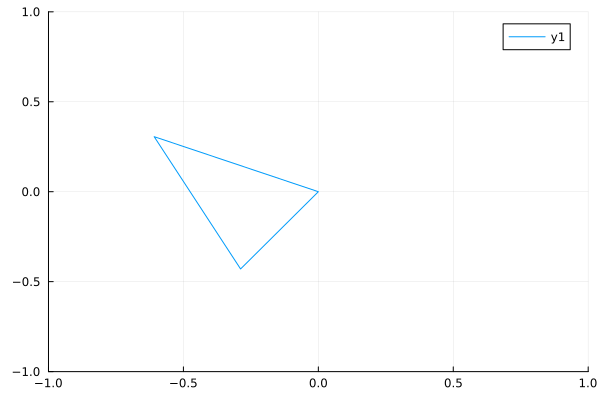

In [446]:
W, U, U1, U2, V1, V2, D=cs_decomposition(n,E,F,E1,E2,F1,F2)
points=draw(W*E1*U1, n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])